In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from bokeh.io import output_notebook
from importlib import reload
%matplotlib inline

import moving_average as ma
import utility

/home/ryohayama/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
if False:
    d1 = pd.read_csv('fx_data/DAT_ASCII_USDJPY_M1_2015.csv', sep=';', header=None)
    d2 = pd.read_csv('fx_data/DAT_ASCII_USDJPY_M1_2016.csv', sep=';', header=None)
    d3 = pd.read_csv('fx_data/DAT_ASCII_USDJPY_M1_2017.csv', sep=';', header=None)
    data = pd.concat([d1, d2, d3], axis=0)
    data.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
    data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)
    data = data.set_index('time')
    del data['volume']

In [3]:
if False:
    # Create 60min data
    agg60 = utility.aggregate_periods(data, period=60)

    # Create 1day data
    agg1d = utility.aggregate_periods(data, period=1440)

    agg60.to_csv('fx_data/2015_2017_USD_JPY_1h.csv')
    agg1d.to_csv('fx_data/2015_2017_USD_JPY_1D.csv')

In [4]:
if True:
    agg60 = pd.read_csv('fx_data/2015_2017_USD_JPY_1h.csv')
    agg60['time'] = pd.to_datetime(agg60['time'], infer_datetime_format=True)
    agg60 = agg60.set_index('time')
    
    agg1d = pd.read_csv('fx_data/2015_2017_USD_JPY_1D.csv')
    agg1d['time'] = pd.to_datetime(agg1d['time'], infer_datetime_format=True)
    agg1d = agg1d.set_index('time')

## Test crossings of SMA10 and SMA25 on 1hr data

In [5]:
collection1 = ma.MACollection(agg60['close'], type_='simple', periods=[10, 25])
collection1.getCrosses()
collection1.plot(plot_width=900)

Loading BokehJS ...

In [6]:
res = utility.eval_metric_performance(collection1.data['close'], collection1.data['cross'], [1, 6, 12, 24, 72, 120])

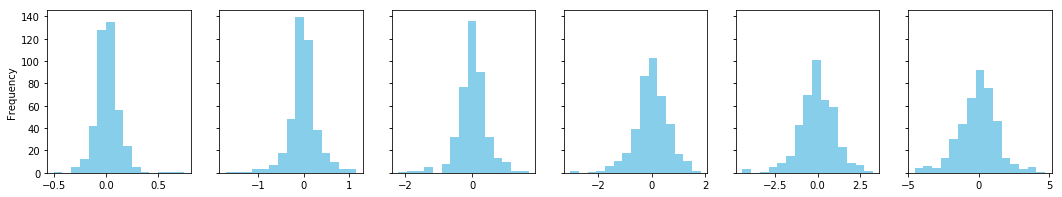

In [7]:
bins=15
color1='skyblue',
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(18, 3), sharex=False, sharey=True)
res[res['cross'] == 1].loc[:, '1period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax1)
res[res['cross'] == 1].loc[:, '6period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax2)
res[res['cross'] == 1].loc[:, '12period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax3)
res[res['cross'] == 1].loc[:, '24period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax4)
res[res['cross'] == 1].loc[:, '72period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax5)
res[res['cross'] == 1].loc[:, '120period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax6)

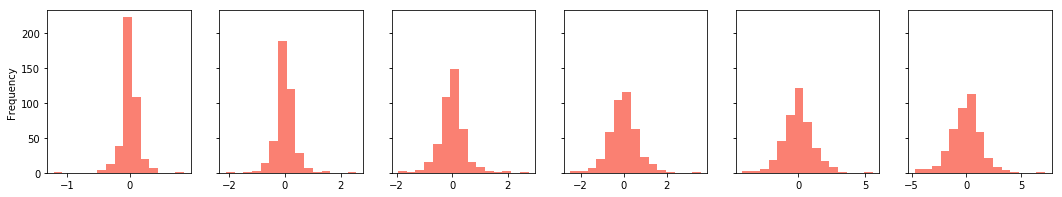

In [8]:
color2='salmon'
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(18, 3), sharex=False, sharey=True)
res[res['cross'] == -1].loc[:, '1period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax1)
res[res['cross'] == -1].loc[:, '6period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax2)
res[res['cross'] == -1].loc[:, '12period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax3)
res[res['cross'] == -1].loc[:, '24period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax4)
res[res['cross'] == -1].loc[:, '72period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax5)
res[res['cross'] == -1].loc[:, '120period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax6)

## Test crossings of SMA10 and SMA25 on 1Day data

In [9]:
collection2 = ma.MACollection(agg1d['close'], type_='simple', periods=[10, 25])
collection2.getCrosses()
collection2.plot(plot_width=900)

Loading BokehJS ...

In [10]:
res = utility.eval_metric_performance(collection2.data['close'], collection2.data['cross'], [1, 6, 12, 24, 72, 120])

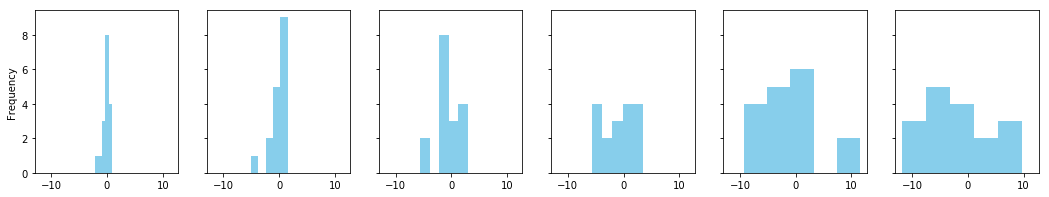

In [11]:
bins=5
color1='skyblue',
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(18, 3), sharex=True, sharey=True)
res[res['cross'] == 1].loc[:, '1period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax1)
res[res['cross'] == 1].loc[:, '6period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax2)
res[res['cross'] == 1].loc[:, '12period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax3)
res[res['cross'] == 1].loc[:, '24period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax4)
res[res['cross'] == 1].loc[:, '72period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax5)
res[res['cross'] == 1].loc[:, '120period_return'].plot(kind='hist', bins=bins, color=color1, ax=ax6)

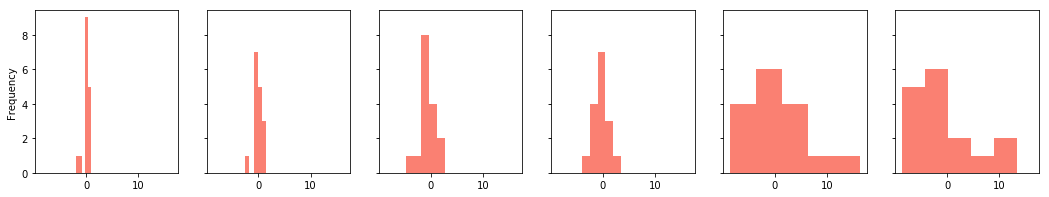

In [12]:
color2='salmon'
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(18, 3), sharex=True, sharey=True)
res[res['cross'] == -1].loc[:, '1period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax1)
res[res['cross'] == -1].loc[:, '6period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax2)
res[res['cross'] == -1].loc[:, '12period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax3)
res[res['cross'] == -1].loc[:, '24period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax4)
res[res['cross'] == -1].loc[:, '72period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax5)
res[res['cross'] == -1].loc[:, '120period_return'].plot(kind='hist', bins=bins, color=color2, ax=ax6)